# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import mnist

# Load and Prepare Dataset

In [2]:
train = pd.read_csv("/home/sanjana/Documents/DSML/Data sets/Mnist/mnist_train.csv")
test = pd.read_csv("/home/sanjana/Documents/DSML/Data sets/Mnist/mnist_test.csv")

In [3]:
train.shape, test.shape

((60000, 785), (10000, 785))

In [4]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = np.asarray(train.drop(['label'], axis=1))
y_train = np.asarray(train['label'])
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [6]:
X_test = np.asarray(test.drop(['label'], axis=1))
y_test = np.asarray(test['label'])
X_test.shape, y_test.shape

((10000, 784), (10000,))

In [7]:
X_train = X_train/255
X_test = X_test/255

# Data Exploration and Visualization

In [8]:
print("y_train values", np.unique(y_train))
print("y_test values", np.unique(y_test))

y_train values [0 1 2 3 4 5 6 7 8 9]
y_test values [0 1 2 3 4 5 6 7 8 9]


y_train distribuion {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
y_test distribuion {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


(array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974.,
        1009.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

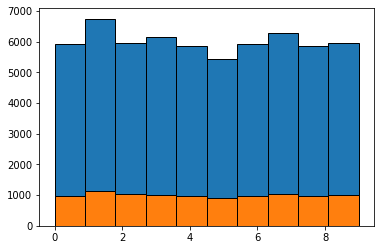

In [9]:
unique, counts = np.unique(y_train, return_counts=True)
print("y_train distribuion", dict(zip(unique, counts)))
plt.hist(y_train, ec='black')
unique, counts = np.unique(y_test, return_counts=True)
print("y_test distribuion", dict(zip(unique, counts)))
plt.hist(y_test, ec='black')

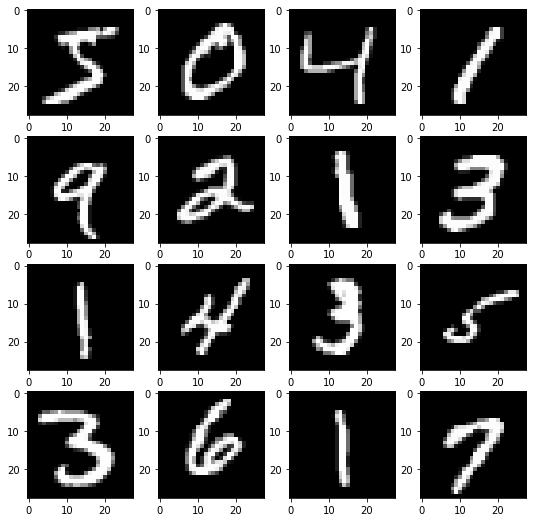

In [10]:
rows = 4
cols = 4
f = plt.figure(figsize=(rows+5,cols+5))
for i in range(rows*cols):
    f.add_subplot(rows,cols,i+1)
    plt.imshow(X_train[i].reshape([28,28]), cmap='gray')

# Build Autoencoder

In [11]:
input_size =784
h1_size = 196
h2_size = 32

In [12]:
x = Input(shape=(input_size,))

h1 = Dense(h1_size, activation='relu')(x)
h = Dense(h2_size, activation='relu')(h1)
h2 = Dense(h1_size, activation='relu')(h)

o = Dense(input_size, activation='sigmoid')(h2)

In [13]:
autoencoder = Model(x,o)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 196)               153860    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                6304      
_________________________________________________________________
dense_2 (Dense)              (None, 196)               6468      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               154448    
Total params: 321,080
Trainable params: 321,080
Non-trainable params: 0
_________________________________________________________________


In [14]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

# Train Model and Predict

In [15]:
history = autoencoder.fit(X_train, X_train, 
                          batch_size=50, 
                          epochs=100, 
                          shuffle=True, 
                          validation_data=(X_test, X_test))

decoded_digits = autoencoder.predict(X_test)

Epoch 1/100
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1391 - accuracy: 0.0113 - val_loss: 0.1016 - val_accuracy: 0.0134
Epoch 2/100
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0981 - accuracy: 0.0124 - val_loss: 0.0936 - val_accuracy: 0.0134
Epoch 3/100
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0924 - accuracy: 0.0127 - val_loss: 0.0898 - val_accuracy: 0.0124
Epoch 4/100
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0891 - accuracy: 0.0130 - val_loss: 0.0869 - val_accuracy: 0.0145
Epoch 5/100
1200/1200 [==============================] - 5s 5ms/step - loss: 0.0868 - accuracy: 0.0127 - val_loss: 0.0849 - val_accuracy: 0.0136
Epoch 6/100
1200/1200 [==============================] - 5s 5ms/step - loss: 0.0851 - accuracy: 0.0135 - val_loss: 0.0840 - val_accuracy: 0.0135
Epoch 7/100
1200/1200 [==============================] - 5s 5ms/step - loss: 0.0840 - accuracy: 0.0129 - val_loss: 0.0828 - val_ac

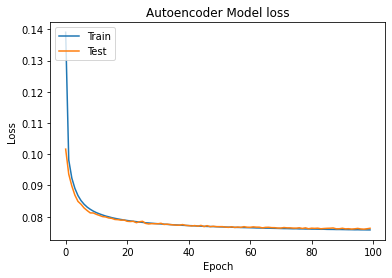

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

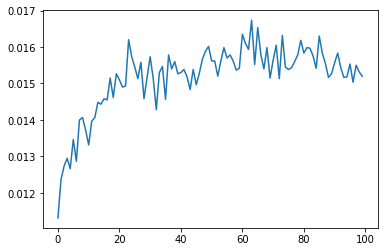

In [20]:
plt.plot(history.history['accuracy'])

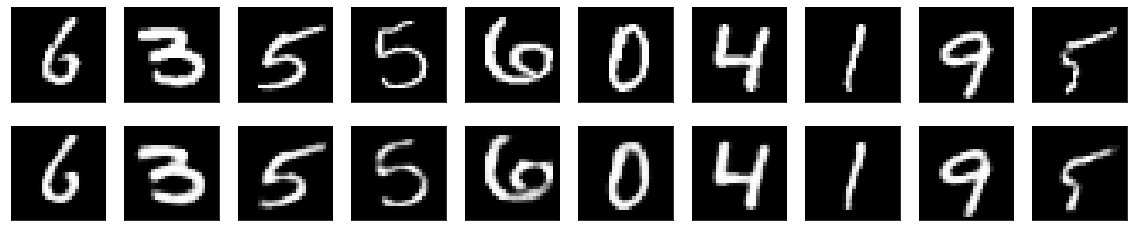

In [21]:
n=10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i+50].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_digits[i+50].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()